In [70]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Setting up the plotting environment
set_matplotlib_formats("svg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import warnings
warnings.filterwarnings("ignore")

# Dataset

This dataset has the actual emotions and the predicted emotions by our Deepface model on each of the 10 angles.

In [72]:
df = pd.read_csv("Dartmouth_predictions.csv")
df.Actual = df.Actual.str.lower()

df.head()

,Actual,Far_left_1,Far_Left_2,Far_Right_1,Far_Right_2,Front_1,Front_2,Left_1,Left_2,Right_1,Right_2,Name
0,fear,sad,fear,sad,sad,happy,happy,happy,angry,happy,neutral,S04_13yoM_Fear
1,fear,sad,sad,sad,sad,neutral,fear,neutral,fear,surprise,fear,S103_12yoM_Fear
2,fear,happy,sad,sad,sad,surprise,surprise,fear,surprise,surprise,happy,S104_12yoM_Fear
3,fear,sad,sad,sad,fear,neutral,neutral,fear,happy,happy,fear,S107_14yoM_Fear
4,fear,neutral,sad,happy,neutral,surprise,neutral,sad,sad,surprise,fear,S108_10yoM_Fear


First, we can see the accuracy results on the Dartmouth dataset for each angle:

In [77]:
prediction_cols = df.columns[1:-1]

angles = []
accuracies = []


for column in prediction_cols:
    
    # Calculate accuracy for Angle
    true_emotions = df.Actual
    predicted_emotions = df[column]
    accuracy = (true_emotions == predicted_emotions).mean()
    
    # Store in neccessary lists
    angles.append(" ".join(column.split("_")))
    accuracies.append(accuracy)

# Display DataFrame    
angle_results = pd.DataFrame({
    "Angle": angles,
    "Accuracy": accuracies
}).set_index("Angle")

angle_results

,Accuracy
Angle,
Far left 1,0.176563
Far Left 2,0.159375
Far Right 1,0.228125
Far Right 2,0.234375
Front 1,0.451562
Front 2,0.431250
Left 1,0.367188
Left 2,0.301563
Right 1,0.356250


Deepface performs best on the first front facing angle of images. We can now use this angle to calculate metrics for each emotion:

In [78]:
emotions = df.Actual.unique()
top_angle = "Front_1"
results = {}

for emotion in emotions:
    
    emotion_df = df[df.Actual == emotion]
    
    true = list(emotion_df.Actual)
    pred = list(emotion_df[top_angle])
    
    results[emotion] = {
        "Test Accuracy": accuracy_score(true, pred),
        "F1 Score": f1_score(true, pred, average="macro"),
        "Recall": recall_score(true, pred, average="macro"),
        "Precision": precision_score(true, pred, average="macro")
    }
    
df_results = pd.DataFrame(results).T 
df_results.index.name = 'Emotion'
df_results.columns = [col.capitalize() for col in df_results.columns] 
df_results

,Test accuracy,F1 score,Recall,Precision
Emotion,,,,
fear,0.2500,0.066667,0.041667,0.166667
angry,0.3000,0.092308,0.060000,0.200000
disgust,0.0375,0.010327,0.005357,0.142857
happy,0.7000,0.117647,0.100000,0.142857
neutral,0.6875,0.135802,0.114583,0.166667
sad,0.3000,0.076923,0.050000,0.166667
surprise,0.6375,0.155725,0.127500,0.200000


# Confusion Matrices
Here, we can see visual representations of the overall and normalized confusion matrices, providing detailed insights into performance of the DeepFace model.

In [62]:
overall_confusion_matrix = confusion_matrix(list(df.Actual), list(df.Front_1), labels=df.Actual.unique())
normalized_confusion_matrix = overall_confusion_matrix.astype('float') / overall_confusion_matrix.sum(axis=1)[:, np.newaxis]

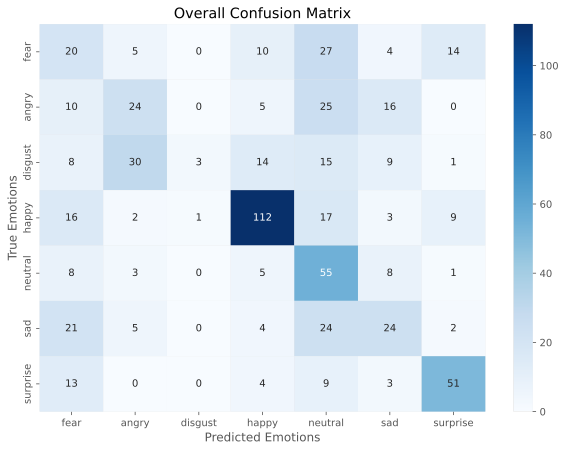

In [65]:
plt.figure(figsize=(10, 7))
sns.heatmap(overall_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted Emotions')
plt.ylabel('True Emotions')
plt.show()

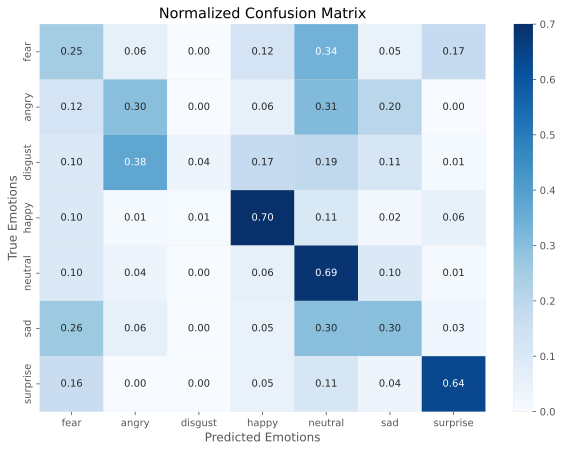

In [66]:
plt.figure(figsize=(10, 7))
sns.heatmap(normalized_confusion_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Emotions')
plt.ylabel('True Emotions')
plt.show()